# Statistics and optimization for machine learning Assignement

# Introduction

In this exam you will be reporting on your implementation of the three main regularization strategies introduced in class, namely Ivano, Tikhonov regularization and early stopping (or computational regularization).


### The plan

You will work exclusively with linear models and the squared loss. Rather than using libraries to fit your models however, you will implemet the learning and testing algorithms from scratch.

Let's start!

## Instructions

Throughout this exam there will be some cells that you will be required to fill in. Complete with the missing code and return the filled notebook on Teams
Some problems will ask you to comment a bit on the results that you will be plotting. In those cases, write in the corresponding markdown cell everything you think it's useful to show that you understood what you have done in that cell.

Best wishes!

### Packages

We will be using standard packages for ML in python such as `numpy` for all linear-algebra related operations and `matplotlib` for visualization. You can install them via [`pip`](https://packaging.python.org/en/latest/tutorials/installing-packages/) or [`anaconda`](https://anaconda.org/) as you prefer.


## Linear Models

What is a linear model? It is just a function $f:\mathbb{R}^d\to
\mathbb{R}$ that can be represented by a vector $w\in\mathbb{R}^d$.

In other words, for any input point $x \in \mathbb{R}^d$, evaluating $f$ in $x$ gives us the output

$\qquad f(x) = x^\top w = x^1 w^1 + x^2 w^2 + \dots + x^d w^d =
\sum_{i=1}^d x^i w^i$,

where $w^i$ and $x^i$ represent the $i$-th components of the vectors $w$ and $x$ respectively.

In other words, if $x$ is a vector (= a collection) of features describing our input, then $f(x)$ returns a weighted sum of such features.

**Note:** in the following we assume that vectors are vertical, namely

$x = \left(\begin{matrix}x^1 \\ \vdots \\ x^d \end{matrix}\right)$

and denote $x^\top = (x^1,\dots,x^d)$ its transpose as an horizontal vector.




### Implementing Linear Models

Let us implement the operation $w^\top x$ in python. To do so, we need first to import the numpy library, which allows us to operate vectors easily.

In [1]:
import numpy as np


Then, we can set our vector $w$. Let's start with something simple in 2 dimensions:

$w = (0.5, 0.3) \in \mathbb{R}^2$

In [2]:
w = np.array([0.5,0.3])


Let us consider an input point $x$, let's say $x = (0.1, -0.4)$, the operation $f(x) = x^\top w$ is now performed as follows:

In [3]:
# define x
x = np.array([0.1,-0.4])

# f(x) = w^T x
y = x[0]*w[0] + x[1]*w[1]

We can print out the value of our output $y$ as follows


In [4]:
print(y)

-0.06999999999999999


The vector product $w^\top x$ is an essential operation in linear algebra (an in machine learning as well!). An efficient implementation is available within the Numpy library. So we can alternatively write it as follows:

In [5]:
ynp = x.dot(w)

print(ynp)

-0.06999999999999999


We see that `ypn` is identical to `y`. The advantage is that the `dot` operation can be used with vectors of arbitrary size and it does not require us to write all the sums for all the products of the elements $w_i x_i$!

### Multiple evaluations

Thanks to the lineartity of our model $f$, we have multiple inputs $x_1, x_2, \dots, x_n$ (we used the subscript to denote different inputs), we can perform the evaluation of all $f(x_1), \dots , f(x_m)$ simultaneously via a single matrix-vector product. To do this, we put all our inputs as the rows of a matrix $X\in\mathbb{R}^{n \times d}$ such that

$\qquad X = \left[\begin{matrix}x_1^\top \\ \vdots \\ x_n^\top \end{matrix}\right] = \left[\begin{matrix}x_1^1 & x_1^2  & \dots & x_1^d \\ x_2^1 & x_2^2  & \dots & x_2^d \\ \vdots & \vdots & \dots & \vdots \\ x_n^1 & x_n^2  & \dots & x_n^d\end{matrix}\right]$

Then, we note that we can collect all the outputs $f(X) = (f(x_1), \dots , f(x_m))^\top$ in a single vector by performing the matrix vector product between $X$ and $w$, namely


$\qquad f(X) = X w = \left[\begin{matrix}x_1^\top \\ \vdots \\ x_n^\top \end{matrix}\right] w = \left[\begin{matrix}x_1^\top w \\ \vdots \\ x_n^\top w \end{matrix}\right] = \left(\begin{matrix}f(x_1) \\ \vdots \\ f(x_n) \end{matrix}\right)$

Luckily, we can carry out the matrix operation using the same notation as for the vector-vector product.

In [6]:
# PRODOTTO RIGHE PER COLONNE
#w = np.array([0.5,0.3])

x1 = np.array([0.1, 0.2])
x2 = np.array([-0.3, 1.1])
x3 = np.array([-2.1, 0.7])

X = np.array([x1,x2,x3])

f = X.dot(w)
print(f)


[ 0.11  0.18 -0.84]


### Evaluating the Empirical Risk

Given the tools we have introduced, we can now proceed evaluating a loss function for a model $w$ on a certain dataset. Let $D = (x_i,y_i)_{i=1}^n$ a dataset of input output pairs (we assume $x_i$ to be vectors in $\mathbb{R}^d$ and $y_i$ scalar values in $\mathbb{R}$). Let $\ell$ be a loss function that compares two outputs $f(x)$ and $y$ telling us that we pay $\ell(f(x),y)$ in predicting $f(x) = x^\top w$ instead of $y$. We can compute the **Empirical risk** of $w$ as the sum of all the errors $\ell(x_i^\top w, y_i)$:

$\qquad \mathcal{E}(w) = \ell(x_1^\top w, y_1) + \dots + \ell(x_n^\top w, y_n) = \frac{1}{n} \sum_{i=1}^n \ell(x_i^\top w, y_i)$

For the rest of this notebook we will assume to work with the **squared loss**, namely

$\qquad \ell(y',y) = (y' - y)^2$

### **Problem 1**: given the dataset in the next cell, evaluate the empirical risk of $w = (0.5,0.3)$.

*Hint:* you can write the empirical risk un closed form as

$\qquad\mathcal{E}(w) = \|Xw - y\|^2$

where $X$ is the matrix with input points as rows, $y$ is the vector with entries corresponding to the output points and $\|\cdot\|$ denoting the (Euclidean) norm of a vector, namely

$\qquad \|x\|^2 = \sum_{j=1}^d (x^j)^2$

You can find all the operations you need from the documentation of `numpy`. For instance, you can compute the norm of a vector following the instructions [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).


In [7]:
x1 = np.array([0.1, 0.2])
x2 = np.array([-0.3, 1.1])
x3 = np.array([-2.1, 0.7])

X = [x1,x2,x3]
X = np.array(X)

y1 = np.array(0.1)
y2 = np.array(3.0)
y3 = np.array(-0.3)

y = [y1,y2,y3]
y = np.array(y)

empirical_risk = (1/X.shape[0])*np.linalg.norm(X.dot(w) - y)**2
empirical_risk


2.7480333333333324

#### Making it a function

We will need to compute the empirical risk of a model $w$ many times in the following. In these cases it is often useful to make the process you wrote above as a function.

In [8]:
def empirical_risk(X, y, w):
    X = np.array(X)
    y = np.array(y)
    return (1/X.shape[0])*np.linalg.norm(X.dot(w) - y)**2
    # return the empirical risk computed in the previous cell

#testing function
empirical_risk(X,y,w)

2.7480333333333324

Just remember that `empirical_risk` is computing the risk for $w$ but for the given dataset of three input-output points defined in the previous  cell. So if you want to change your dataset you will also need to change the function (you could do something smarter by passing the dataset to the function if you want. _Maybe there is a compact way to pass the dataset?_).

## Optimization: Minimizing the Empirical Risk

One thing we might want to do, is to find the best model (or at least 'a' best model) $w$ that minimizes the empirical risk. In class we have called this the _empirical risk minimizer (ERM)_:


$\qquad w_{ERM} = \arg \min_{w\in\mathbb{R}^d} ~ \mathcal{E}(w)$

($\arg\min$ simply tries to find the _argument_ that _minimizes_ $\mathcal{E}$).

From what we have seen in class, the ERM might overfit our data. In the following we will review different form of regularization to avoid this problem), but for now let's just write an algorithm that minimizes $\mathcal{E}(w)$. We will then adapt what we have implemented to include also regularization.

### Gradient Descent

In class we have seen how first order iterative optimization methods can be used to minimize an objective functional $\mathcal{L}(\cdot)$

The gradient descent algorithm is implemented according to the following process:
- choose an initial point $w_0$ (for example $w_0 = 0$).
- for any time step $t>0$ we obtain $w_t$ as
$\qquad w_t = w_{t-1} - \eta \nabla \mathcal{L}(w_{t-1}) \qquad\qquad$ with $\eta>0$ a step size.
Namely, from the previous iterate $w_{t-1}$, we perform a step in the opposite direction to the one pointed by the gradient, with step size $\eta$.

We can repeat this process for as long as we want, although usually we will set up a total number of desired steps $T$ and will  return $w_T$. Of course a key question is when is it a good idea to stop? Let's see what happens empirically:

#### **Problem 2: Implementing Gradient Descent**

Implement gradient descent to minimize the empirical risk. You will need to choose $\eta$, $T$ and will need to be able to write down the gradient of $\mathcal{E}(w)$. Regarding the latter, remember that:

- The gradient of a sum is the sum of the gradients: $\nabla \mathcal{E}(w) = \nabla \frac{1}{n} \sum_{i=1}^n (x_i^\top w  - y_i)^2 =  \frac{1}{n} \sum_{i=1}^n \nabla (x_i^\top w  - y_i)^2$,
- The gradient of the squared loss is
$\qquad\qquad\qquad \nabla (x_i^\top w  - y_i)^2 = 2 x_i x_i^\top w + y_i x_i$

__**Note:** analogously to when we computed the empirical risk $\mathcal{E}(w)$ using a compact matrix notation (by putting all our input-output training points in the matrix $X$ or in the vector $y$) also the gradient $\nabla \mathcal{E}(w)$ can be written (and computed) in matrix notation using only matrix-matrix and matrix-vector products. Doing this is not necessary to succeed in this problem, but it can help you out speeding up computations__

Let's go!

<span style="color:yellow">Comment: MATRIX NOTATION</span>

$\qquad X = \left[\begin{matrix}x_1^\top \\ \vdots \\ x_n^\top \end{matrix}\right] = \left[\begin{matrix}x_1^1 & x_1^2  & \dots & x_1^d \\ x_2^1 & x_2^2  & \dots & x_2^d \\ \vdots & \vdots & \dots & \vdots \\ x_n^1 & x_n^2  & \dots & x_n^d\end{matrix}\right]$, $\qquad X^\top = \left[\begin{matrix}x_1 & \ldots & x_n \end{matrix}\right] = \left[\begin{matrix}x_1^1 & x_2^1  & \dots & x_n^1 \\ x_1^2 & x_2^2  & \dots & x_n^2 \\ \vdots & \vdots & \dots & \vdots \\ x_1^d & x_2^d  & \dots & x_n^d\end{matrix}\right]$ $\qquad w =  \left[\begin{matrix}w_1 \\ w_d \end{matrix}\right]$ $\qquad y =  \left[\begin{matrix} y_1 \\ \vdots \\ y_n \end{matrix}\right]$


$\nabla \mathcal{E}(w) = \nabla \frac{1}{n} \sum_{i=1}^n (x_i^\top w  - y_i)^2 =  \frac{1}{n} \sum_{i=1}^n \nabla (x_i^\top w  - y_i)^2 =  \frac{1}{n} \sum_{i=1}^n 2 x_i x_i^\top w + y_i x_i$


##### In our case ($n=3$, $d=2$), in terms of matrix matrix and matrix vector products:

$\sum_{i=1}^3 x_i x_i^\top w = (x_1 x_1^\top w + x_2 x_2^\top w + x_3 x_3^\top w) =
\left[\begin{matrix}x_1 & x_2 & x_3 \end{matrix}\right]  \left[\begin{matrix}x_1^\top \\ x_2^\top \\ x_3^\top \end{matrix}\right] w  = 
\left[\begin{matrix}x_1^1 & x_2^1 & x_3^1 \\ x_1^2 & x_2^2 & x_3^2 \end{matrix}\right] \left[\begin{matrix}x_1^1 & x_1^2  \\ x_2^1 & x_2^2 \\ x_3^1 & x_3^2 \end{matrix}\right] \left[\begin{matrix}w_1 \\ w_d \end{matrix}\right]= X^\top X w$

$\sum_{i=1}^3 y_i x_i = (y_1 x_1 + y_2 x_2 + y_3 x_3) = \left[\begin{matrix}x_1 & x_2 & x_3 \end{matrix}\right] \left[\begin{matrix}y_1 \\ y_2 \\ y_3 \end{matrix}\right]  = 
\left[\begin{matrix}x_1^1 & x_2^1 & x_3^1 \\ x_1^2 & x_2^2 & x_3^2 \end{matrix}\right] \left[\begin{matrix}y_1 \\ y_2 \\ y_3 \end{matrix}\right] = X^\top y $
##### in general: 
$\nabla \mathcal{E}(w) = \frac{1}{n} \sum_{i=1}^n 2 x_i x_i^\top w + y_i x_i = \frac{1}{n}  (2 X^\top X w + X^\top y) $

In [9]:
T = 100
eta = 0.1
d = 2

# set the initial w to be the vector with all 0s
w = np.zeros(d)

# in this list we will store the function values
values = []

# let's start by putting the first value in
values.append(empirical_risk(X,y,w))

# implement gradient descent
for t in range(T):
    grad_w= (2*((X.T).dot(X.dot(w))-((X.T).dot(y))))/X.shape[0]
    w = w-(eta*grad_w)
    values.append(empirical_risk(X,y,w))



#### Plotting

If you want to visualize what's going on with the function value across multiple iterations you can use the following code. It will be useful also in the following.

[Text(0.5, 0, '$ epoch $'), Text(0, 0.5, '$ \\mathcal{E} $')]

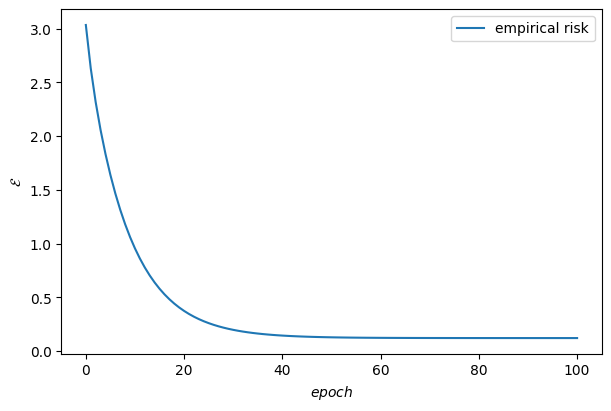

In [10]:
import matplotlib.pyplot as plt

# plt.plot(values)
# plt.show()

# PLOT 
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(values, label='empirical risk')  # Plot some data on the axes.
ax.legend()
ax.set(xlabel="$ epoch $", ylabel="$ \mathcal{E} $")

Try a few different $\eta$ to get a sense of what happens when they are too large, too small or "just about right". But in general... how do we choose $\eta$?

[]

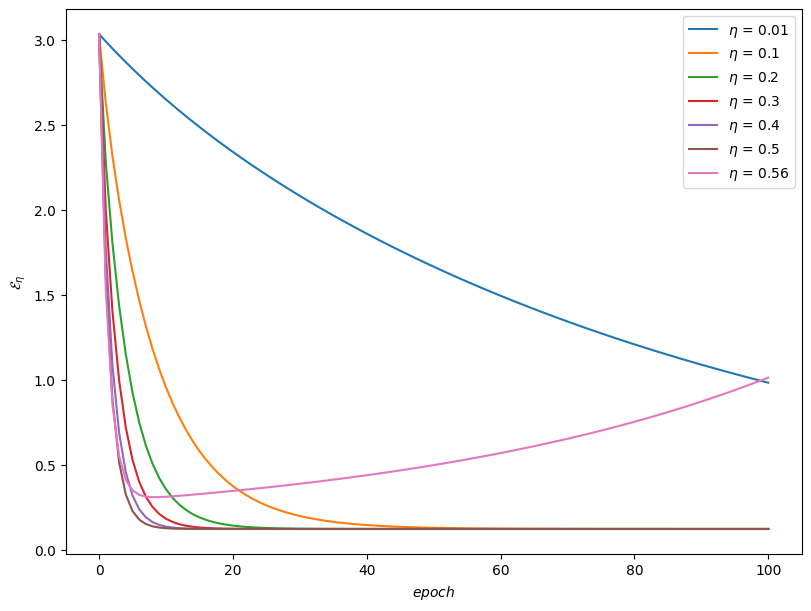

In [11]:
T = 100
d = 2

# in this list we will store the function values
list_val = []

eta_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.56, 0.01]
    
for eta in eta_vals:
    # implement gradient descent
    w = np.zeros(d)
    values = []
    values.append(empirical_risk(X,y,w))
    for t in range(T):
        grad_w= (2*((X.T).dot(X.dot(w))-((X.T).dot(y))))/X.shape[0]
        w = w-(eta*grad_w)
        values.append(empirical_risk(X,y,w))
    list_val.append(values)


# PLOT 
fig, ax = plt.subplots( figsize=(8, 6), layout='constrained')
ax.plot(list_val[6], label='$\eta$ = 0.01')  # too low value
ax.plot(list_val[0], label='$\eta$ = 0.1') 
ax.plot(list_val[1], label='$\eta$ = 0.2') 
ax.plot(list_val[2], label='$\eta$ = 0.3') 
ax.plot(list_val[3], label='$\eta$ = 0.4') 
ax.plot(list_val[4], label='$\eta$ = 0.5')  
ax.plot(list_val[5], label='$\eta$ = 0.56')  # too high value


ax.set(xlabel="$ epoch $", ylabel="$ \mathcal{E}_{\eta} $")
ax.legend()
plt.plot()


<span style="color:yellow">**COMMENT**</span>

The graph above shows the behavior of the empirical risk across multiple iterations ($T = 100$) as the parameter $ \eta $ varies.

As can be seen from the graph:
- when ($ 0.2 \le \eta \le 0.5 $) ​the empirical risk converges after a few iterations to a minimum value. Those are good learning rates since in a small amount of steps (T) them take us to the minimum empirical risk values.
- when the values ​​of the parameter are too small (as show for example in the graph $\eta = 0.01$) there is a very slow descent of the empirical risk. For computational performance reasons we would like a learning rate that minimizes empirical risk quickly.
- when the values ​​of the parameter are too high (as show for example in the graph $\eta = 0.56$) there is a divergence of the empirical risk as the number of iterations increases.

In this case we could choose $ \eta = 0.5 $ in order to have a rapid convergence of the empirical risk to the minimum value. 


#### Convergence of Gradient Descent
In class we have discussed how gradient descent "converges" to the ideal solution of the optimization problem when the objective functional $\mathcal{L}(\cdot)$ is convex and $M$-smooth (the latter means that the derivative $\nabla\mathcal{L}(\cdot)$ is Lipschitz with constant $M>0$).

We are in luck! The squared loss is:

- Convex,
- It's differentiable
- It's gradient is Lipschitz continuous **(Question: with constant $M=?$)**

The sum (or average) of multiple functions with the properties above still enjoy the same properties. Therefore, they hold also for the case $\mathcal{L}(\cdot) = \mathcal{E}(\cdot)$ the objective functional corresponds to the empirical risk.

**Convergence**: A theorem that we have discussed in class tells us that as long as we take $\eta \in (0, 2/M)$, gradient descent converges. Verify this by yourself by taking $\eta = 1/M$ in the next cell. In the case of the squared loss risk $M$ corresponds to the largest singular value of the covariance matrix $X^\top X$. In numpy this can be done as follows.

M: 5.380354739281607
T: 1000
eta: 0.18586135086950076
empirical risk: 0.12244218850181665


[Text(0.5, 0, '$ epoch $'), Text(0, 0.5, '$ \\mathcal{E} $')]

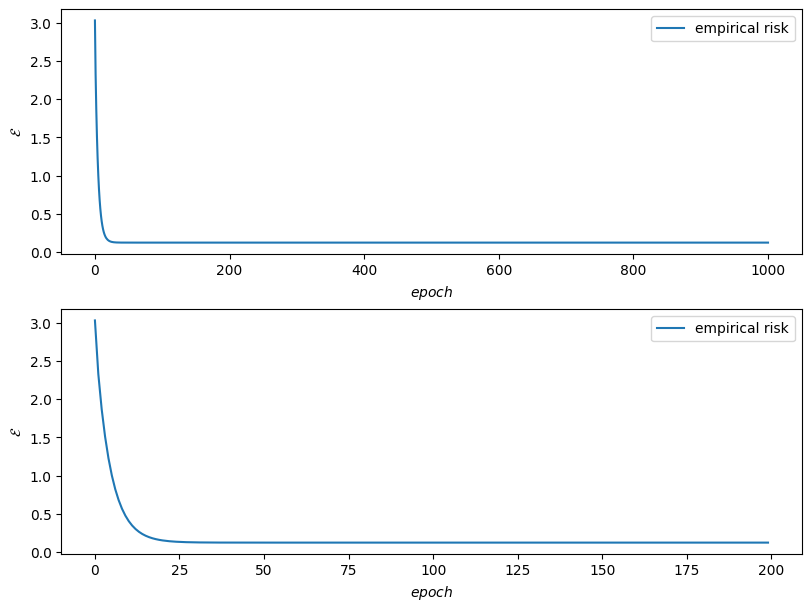

In [12]:
T = 1000
M = np.linalg.norm(X.T.dot(X), 2)
eta = 1.0 / M
w = np.zeros(d)

# in this list we will store the function values
values = []

# let's start by putting the first value in
values.append(empirical_risk(X,y,w))

# implement gradient descent
for t in range(T):
    grad_w = (2*((X.T).dot(X.dot(w))-((X.T).dot(y))))/len(X)
    w = w-(eta*grad_w)
    # compute the empirical risk of the current iterate and store it
    values.append(empirical_risk(X,y,w))

print("M: {}".format(M))
print("T: {}".format(T))
print("eta: {}".format(eta))
print("empirical risk: {}".format(values[-1]))


# PLOT 
fig, ax = plt.subplots(2, figsize=(8, 6), layout='constrained')
ax[0].plot(values, label='empirical risk')  # Plot some data on the axes.
ax[0].legend()
ax[0].set(xlabel="$ epoch $", ylabel="$ \mathcal{E} $")

ax[1].plot(values[:200], label='empirical risk')  # Plot some data on the axes.
ax[1].legend()
ax[1].set(xlabel="$ epoch $", ylabel="$ \mathcal{E} $")


<span style="color:yellow">**COMMENT**</span>

As can be seen from the previous graphs, the empirical risk quickly converges to the value $0.1224$ for $ \eta = \frac{1}{M} $
where $ M $ corresponds to the largest singular value of the covariance matrix $X^\top X$ in the case of the squared loss risk.

## Overfitting and Regularization

Now that we have implemented a startegy to find a potentially good model $w$, we should see how it fares on test data. To do so, we should repeat the whole process with real data however, so that training and test set are not arbitrary, but rather coming from the same distribution. Let's load a train and test dataset in matrix format.

In [13]:
import pickle

path_to_data = "./dataset_mda.pckl"# put the string to the file 'dataset.pckl'

with open(path_to_data, 'rb') as f:
    data = pickle.load(f)

Xtr = data['Xtr']
ytr = data['ytr']
Xts = data['Xts']
yts = data['yts']

# get the actual dimension of the space where the inputs live!
ntr, d =  Xtr.shape
nts = Xtr.shape[0]

print("ntr: {}, d: {}".format(ntr, d))
print("nts: {}".format(nts))

ntr: 67, d: 8
nts: 67


We have put our input and output training data points (those on which we will run our empirical risk minimization algorithm) inside the rows of the matrix `Xtr` and the entries of the vector `ytr`. The matrix `Xts` and `yts` contain the test data points.

Let's repeat the training process finding the empirical risk minimizer on the training points.

**Remember to change the `empirical_risk` function with the new dataset!**

T: 1000
M: 226.1523994507909
eta: 0.004421796993657777


[Text(0.5, 0, '$ epoch $'), Text(0, 0.5, '$ \\mathcal{E} $')]

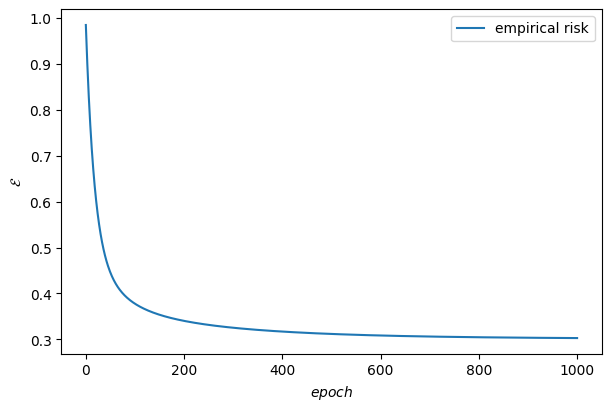

In [14]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 
w = np.zeros(d)

# in this list we will store the function values
values = []

# let's start by putting the first value in
values.append(empirical_risk(Xtr, ytr, w))

# implement gradient descent
for t in range(T):
    grad_w=(2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/Xtr.shape[0]
    w =w-(eta*grad_w)

    # compute the empirical risk of the current iterate and store it
    values.append(empirical_risk(Xtr, ytr,w))

w_best = w

print("T: {}".format(T))
print("M: {}".format(M))
print("eta: {}".format(eta))

# plt.plot(values)
# plt.show()

# PLOT 
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(values, label='empirical risk')  # Plot some data on the axes.
ax.legend()
ax.set(xlabel="$ epoch $", ylabel="$ \mathcal{E} $")

Finally compute the test error and compare it with the final (and best) training error.

In [15]:
test_error = empirical_risk(Xts, yts, w_best) # compute here the error of the model w on the test set Xts, yts

print('Training error:', values[-1])
print('Test error:', test_error)

Training error: 0.3028549398626575
Test error: 0.3388721478406329


<span style="color:yellow">**COMMENT**</span > 

By setting the parameter $\eta = 1.0 / M$ with $T=1000$ we get that the empirical risk on the training dataset rapidly decreases to $ 0.303 $.

Comparing the values ​​of training and test error we observe that they are close and this leads us to observe that the model is quite good but just a bit overfitted.

Are they comparable? If not, this is due to the model fitting too well the training data and not generalizing to test points, something that we referred to as **Overfitting** in class.

Now that we have seen overfitting in action let us consider and implement a few of the regularization strategies we discussed in class.

### Tikhnov Regularization

In Tikhonov regularization we want to find a model $w$ that fits well our training data while not growing too "complicated". This is enforced by means of a penalty (or regularizer) $P(w)$ in the optimization problem

$\qquad w_\lambda = \arg\min_{w} ~ \mathcal{E}(w) + \lambda P(w).$

In particular, we considered the case where $P(w) = \|w\|^2$ is the squared Euclidean norm.

#### **Problem 3**: Implementing Tikhonov Regularization

Implement gradient descent for tikhonov regularization. Recall that the gradient of the squared Euclidean norm is

$\qquad \nabla \|w\|^2 = 2 w$,

and that the Lipschitz constant of the function $w\mapsto \lambda w$ is $\lambda$ (this will be useful to choose $\eta$ appropriately for gradient descent).

T: 1000
M: 226.1523994507909
eta: 0.004421796993657777
lambda: 0.1
Training error: 0.35157717507725644
Test error: 0.37228185608123954


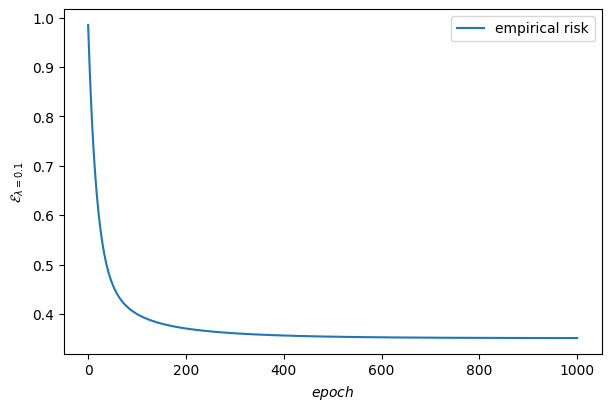

In [16]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 
w = np.zeros(d)

lam = 0.1 # how to choose it?

# in this list we will store the function values
values = []

# define a new function that compute the regularized empirical risk (namely the risk plus the regularization penalty)
def regularized_empirical_risk(X, y, w, lam):
    X = np.array(X)
    y = np.array(y)
    return ((1/X.shape[0])*np.linalg.norm(X.dot(w) - y)**2) + lam*(np.linalg.norm(w)**2)     # return the regularized empirical risk


# let's start by putting the first value in
values.append(regularized_empirical_risk(Xtr, ytr, w, lam))

# implement gradient descent
for t in range(T):
    grad_w = (2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/len(Xtr) + lam*2*w # compute the gradient of the empirical risk
    w = w-(eta*grad_w) # write the update rule

    # compute the empirical risk of the current iterate and store it
    values.append(regularized_empirical_risk(Xtr, ytr, w, lam))

# print(values[-1])
print("T: {}".format(T))
print("M: {}".format(M))
print("eta: {}".format(eta))
print("lambda: {}".format(lam))


# plt.plot(values)
# plt.show()
# PLOT 
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(values, label='empirical risk')  # Plot some data on the axes.
ax.legend()
ax.set(xlabel="$ epoch $", ylabel="$ \mathcal{E}_{\lambda = 0.1} $")

test_error = (regularized_empirical_risk(Xts, yts, w, lam))              
print('Training error:', values[-1])
print('Test error:', test_error)


<span style="color:yellow">**COMMENT**</span> 

- When $\lambda=0$, the function reduces to ordinary least squares expression: $\quad w_\lambda = \arg\min_{w} ~ \mathcal{E}(w)$.
- When $\lambda$ increase the contribution of the regulator $\lambda P(w)$ becomes increasingly important. 

Implementing the Tikhonov regularization with the parameters shown above we obtain that, compared to the case without regolarization, the train and test errors increase but their difference decreases. 


As part of this problem, compute multiple the test error for the final model. Play with different values of $\lambda$. How does it change? How does the training error change? Do this in the next cell: **plot a graph showing on the x-axis different values of lambda and on the y-axis the corresponding train and test errors for that $\lambda$. Comment on any interesting pattern you onbserve.**

In [17]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 


# in this list we will store the function values
train_err = []
test_err = []
lam_val = []
# let's start by putting the first value in

# implement gradient descent
for lam in np.arange(0, 60, 0.01):
    w = np.zeros(d) 
    for t in range(T):
        grad_w = (2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/len(Xtr) + lam*2*w # compute the gradient of the empirical risk
        w = w-(eta*grad_w) # write the update rule

    # compute the empirical risk of the current iterate and store it
    train_err.append(regularized_empirical_risk(Xtr, ytr, w, lam))
    test_err.append(regularized_empirical_risk(Xts, yts, w, lam))
    lam_val.append(lam)



print("T: {}".format(T))
print("M: {}".format(M))
print("eta: {}".format(eta))


T: 1000
M: 226.1523994507909
eta: 0.004421796993657777


[Text(0.5, 0, '$ \\lambda $'), Text(0, 0.5, '$ \\mathcal{E}_{\\lambda} $')]

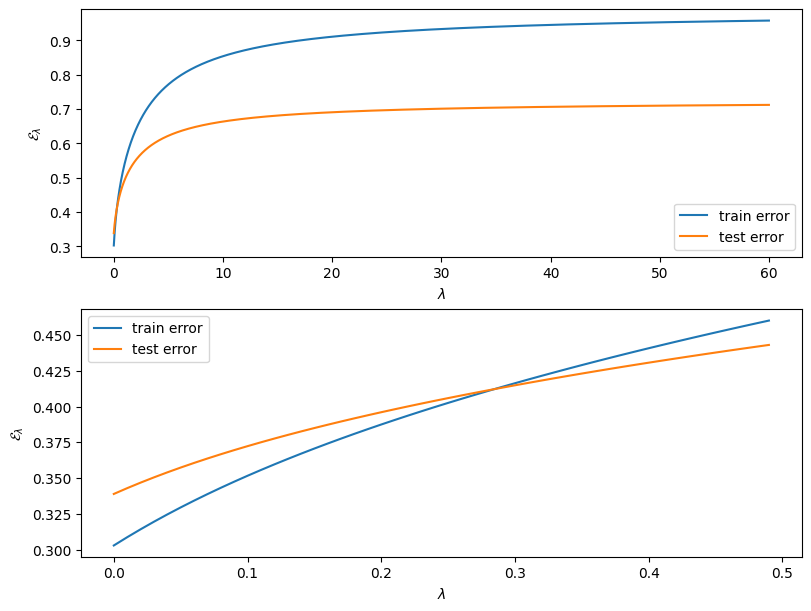

In [18]:
# PLOT 
fig, ax = plt.subplots(2, figsize=(8, 6), layout='constrained')
ax[0].plot(lam_val, train_err, label='train error')  # Plot some data on the axes.
ax[0].plot(lam_val, test_err, label='test error')  # Plot more data on the axes...
ax[0].legend()
ax[0].set(xlabel="$ \lambda $", ylabel="$ \mathcal{E}_{\lambda} $")

ax[1].plot(lam_val[:50], train_err[:50], label='train error')  # Plot some data on the axes.
ax[1].plot(lam_val[:50], test_err[:50], label='test error')  # Plot more data on the axes...
ax[1].legend()
ax[1].set(xlabel="$ \lambda $", ylabel="$ \mathcal{E}_{\lambda} $")

In [19]:
# calculate the point of intersection between the two curves
index=0
minimum = 999
tmp = 0
for i in range(len(train_err)):
    tmp = abs(test_err[i] - train_err[i] )
    if tmp <= minimum:
        minimum = tmp
        index = i

# print(train_err[index], test_err[index])
# print(train_err[index] - test_err[index])
print(f"lambda value at the intersection {lam_val[index]}")

lambda value at the intersection 0.28


<span style="color:yellow">**COMMENT**</span> 

The result above shows the evaluation of the regularized empirical risk for different values of $\lambda$ for training and test sets.
The value that was chosen for $\eta$ is $\frac 1 M$, which is the value that was recommended for the ERM problem when using the squared loss function.

As visible in the plot above, the **train_error** and the **test_error** curves intersect at $\lambda \sim 0.28$. 

Two different behaviors of the empirical risk were observed in the graphs above:

- $\lambda \gt 0.28 \quad$  The empirical risk for the train and the test set grows up to two different constant values. After a threshold lambda value, the empirical risk is constant and the model does not seem to improve any further.
Looking at the w expression, as $\lambda$ increases, the values ​​of the coefficients w must decrease to satisfy the minimization problem. In this region the training error is greater than the test error and we observe underfitting.

- $\lambda \lt 0.28 \quad$ looking at the w expression, as $\lambda$ is very small the w values must increase making the term $\|w\|^2$ even bigger. In this case, the test error is higher than the training error and we observed a slight overfitting. 




### Ivanov Regularization

Another regularization strategy we considered in class was Ivanov regularization. This consists in finding the best $w$ **within a ball of fixed radius $\gamma$** fitting the empirical risk. Formally:

$\qquad\qquad w_\gamma = \arg\min_{\|w\|\leq \gamma}~ \mathcal{E}(w)$

#### **Problem 4** Implement Ivanov Regularization

Ivanov regularization is an example of __constrained optimization__, namely optimization of a function over a smaller set than the entire $\mathcal{R}^d$. We cannot use gradient descent directly, since gradient desent does not have any way to control the norm of $w$ and might lead the iterates outside the ball of radius $\gamma$. However, we have discussed in class that we can modify gradient descent to **projected** gradient descent, by adding a small routine at the end of each step, projecting back to the ball of radius $\eta$.

In other words, projected gradient descent works as follows:
- choose an initial point $w_0$ (for example $w_0 = 0$).
- for any time step $t>0$ compute $u_t$ as
$\qquad u_t = w_{t-1} - \eta \nabla \mathcal{E}(w_{t-1})$,
- obtain
$\qquad\qquad\qquad w_t = \left\{ \begin{matrix} u_t & \textrm{if}\quad \|u_t\|\leq \gamma \\ u_t/\|u_t\| & \textrm{otherwise}\end{matrix}\right.$,
In other words, keep $u_t$ as it is if it is already in the ball or project it on the surface of the ball if it is outside.

Equipped with this variant of gradient descent, proceed in implementing Ivanov regularization.

Training error: 0.3028549398626575
Test error: 0.3388721478406329


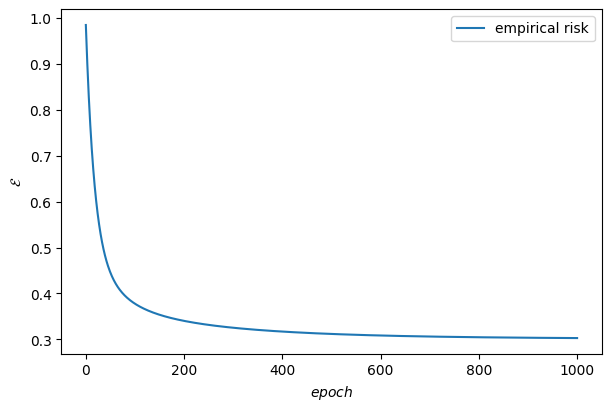

In [20]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 
gamma = 1.0

w = np.zeros(d)

# in this list we will store the function values
values = []

# let's start by putting the first value in
values.append(empirical_risk(Xtr, ytr, w))

# implement gradient descent
for t in range(T):

    grad_w=(2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/len(Xtr)
    u =w-(eta*grad_w)
    norm_u = np.linalg.norm(u)
    # write the projection for u to w
    if norm_u <= gamma:
        w = u   
    else: 
        w = u/norm_u
        
    # compute the empirical risk of the current iterate and store it
    values.append(empirical_risk(Xtr, ytr, w))


# plt.plot(values)
# plt.show()
# PLOT 
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(values, label='empirical risk')  # Plot some data on the axes.
ax.legend()
ax.set(xlabel="$ epoch $", ylabel="$ \mathcal{E} $")

test_error = (empirical_risk(Xts, yts, w))              
print('Training error:', values[-1])
print('Test error:', test_error)


How does the test error changes with different values $\gamma$? To complete the problem repeat the same analysis you did for Tikhonov, plotting train and test error (y-axies) against different values of $\gamma$ (x-axis). Comment on any interesting pattern you observe.

In [21]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 
gamma = 1.0

# in this list we will store the function values
train_err = []
test_err = []
gamma_val = []

# # let's start by putting the first value in
# values.append(empirical_risk(Xtr, ytr, w))

# implement gradient descent
for gamma in np.arange(0, 1.5, 0.01):
    w = np.zeros(d)

    for t in range(T):

        grad_w=(2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/len(Xtr)
        u =w-(eta*grad_w)
        norm_u = np.linalg.norm(u)
        # write the projection for u to w
        if norm_u <= gamma:
            w = u   
        else: 
            w = u/norm_u
            
    # compute the empirical risk of the current iterate and store it
    train_err.append(empirical_risk(Xtr, ytr, w))
    test_err.append(empirical_risk(Xts, yts, w))
    gamma_val.append(gamma)

print("T: {}".format(T))
print("M: {}".format(M))
print("eta: {}".format(eta))


T: 1000
M: 226.1523994507909
eta: 0.004421796993657777


[Text(0.5, 0, '$ \\lambda $'), Text(0, 0.5, '$ \\mathcal{E}_{\\lambda} $')]

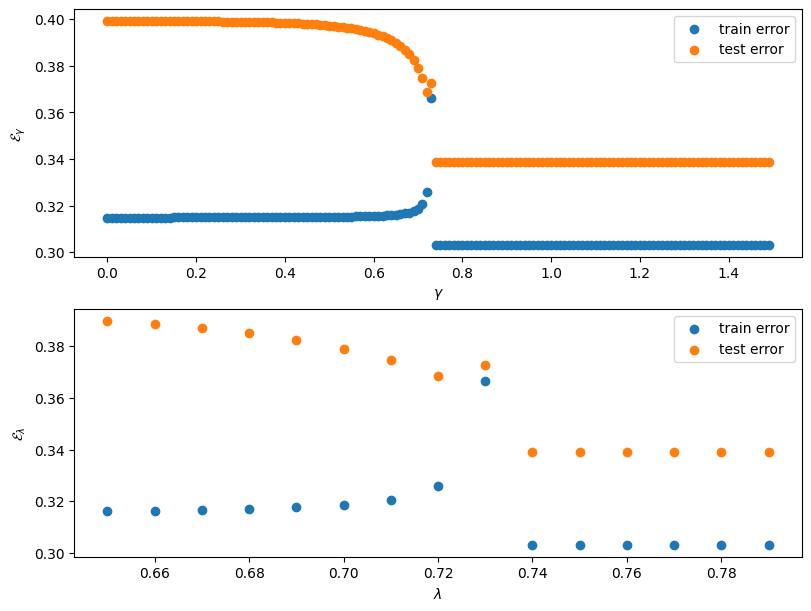

In [22]:
# PLOT 
fig, ax = plt.subplots(2, figsize=(8, 6), layout='constrained')
ax[0].scatter(gamma_val, train_err, label='train error')  # Plot some data on the axes.
ax[0].scatter(gamma_val, test_err, label='test error')  # Plot more data on the axes...
ax[0].legend()
ax[0].set(xlabel="$ \gamma $", ylabel="$ \mathcal{E}_{\gamma} $")

ax[1].scatter(gamma_val[65:80], train_err[65:80], label='train error')  # Plot some data on the axes.
ax[1].scatter(gamma_val[65:80], test_err[65:80], label='test error')  # Plot more data on the axes...
ax[1].legend()
ax[1].set(xlabel="$ \lambda $", ylabel="$ \mathcal{E}_{\lambda} $")

<span style="color:yellow">**COMMENT**</span>

The graph shows two different behaviour of the empirical risk:

- $\gamma < 0.7 \quad$ The effect of regularization is appreciable but both errors are higher than the no-regularization case, highlighting the overfitting phenomena.
- At $\gamma \sim 0.73\quad $ a rapid variation makes the training error increase while the test error increase until they meet each other, highlighting underfitting phenomena.
- $\gamma > 0.7 \quad$ The regularization has no effect, and the two errors are the same of the case with no regularization.  

$\gamma$ values ​​close to $0.72$ could represent a good choice for the training of the model, where an slight increase in the training error corresponds to a decrease in the test error.


### Computational Regularization (AKA Early stopping)

Finally we will review one of the strategies we discussed in class: early stopping. As the name suggests, this strategy consisst simply in not performing "too many" steps of gradient descent, but rather "stopping early". How early? Well, the number of steps done becomes the regularization parameter. Too many and we might overfit, too few and we are not learning enough from our data.


#### **Problem 5**: Implement Early Stopping

Interestingly enough, you have already implemented this strategy in Problem 2 when you optimized the empirical risk without any penalty or constraint. You simply have to play with the regularization parameter `T` to see what happens. To complete this problem repeat the same analysis you have done for Tikhonov and Ivanov: plot the train and test errors with respect to the corresponding values of the regularization parameter (in this case the number of total steps `T`). Comment on any interesting pattern you observe.


[Text(0.5, 0, '$ iterations $'), Text(0, 0.5, '$ \\mathcal{E}_{T} $')]

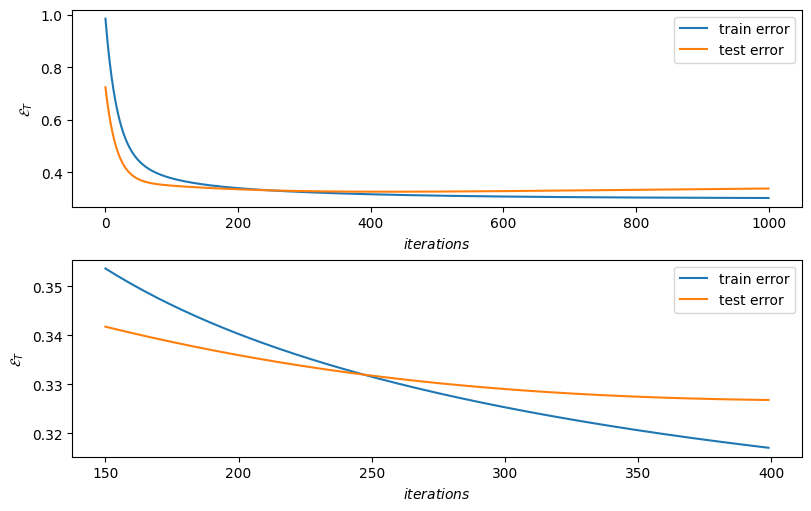

In [23]:
T = 1000
M = np.linalg.norm(Xtr.T.dot(Xtr), 2)
eta = 1.0 / M 
gamma = 1.0

w = np.zeros(d)

# in this list we will store the function values
train_err=[]
test_err =[]

train_err.append(empirical_risk(Xtr, ytr,w))
test_err.append(empirical_risk(Xts, yts,w))

for t in range(T):
    grad_w=(2*((Xtr.T).dot(Xtr.dot(w))-((Xtr.T).dot(ytr))))/len(Xtr)
    w =w-(eta*grad_w)

    # compute the empirical risk of the current iterate and store it
    train_err.append(empirical_risk(Xtr, ytr,w))
    test_err.append(empirical_risk(Xts, yts,w))

fig, ax = plt.subplots(2, figsize=(8, 5), layout='constrained')
ax[0].plot( train_err, label='train error')  # Plot some data on the axes.
ax[0].plot( test_err, label='test error')  # Plot more data on the axes...
ax[0].legend()
ax[0].set(xlabel="$ iterations $", ylabel="$ \mathcal{E}_{T} $")

iterations = [i for i in range(150, 400, 1)]
ax[1].plot(iterations, train_err[150:400], label='train error')  # Plot some data on the axes.
ax[1].plot(iterations, test_err[150:400], label='test error')  # Plot more data on the axes...
ax[1].legend()
ax[1].set(xlabel="$ iterations $", ylabel="$ \mathcal{E}_{T} $")



<span style="color:yellow">**COMMENT**</span>


The training error decreases as the number of iterations while the tests error decreases until it reaches a minimum around $T = 420$ iterations and then grows with the number of iterations.

We observed the following patterns:
- $T \sim 250 \quad$ test error and training error intersect.
- $T \lt 250 \quad$ for too few iterations the training error is higher than the test error. The model is too simple and this causes underfitting.
- $T \gt 250 \quad$ for too many iterations the model fitting too well the training data and not generalizing leading to overfitting.






### Conclusion

You have reached the end of this exam. Congratulations!

To complete the exam send the filled notebook to the email **`c` dot `ciliberto` at `ucl` dot `ac` dot `uk`** with the subject "(Master MDA)(yourname-yoursurname).

